<a href="https://colab.research.google.com/github/ssttv/ml-resources/blob/master/fastai_dl5_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y -qq software-properties-common module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!pip3 install fastai==0.7.0

In [0]:
!pip3 install torchtext==0.2.3

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *

In [2]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip
!mkdir data
!mv ml-latest-small data

--2019-01-05 10:01:17--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  --.-KB/s    in 0.1s    

2019-01-05 10:01:17 (7.33 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [0]:
path='data/ml-latest-small/'

In [4]:
ratings = pd.read_csv(path+'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies = pd.read_csv(path+'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
g=ratings.groupby('userId')['rating'].count()
topUsers=g.sort_values(ascending=False)[:15]

g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:15]

top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')

pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


In [0]:
val_idxs = get_cv_idxs(len(ratings))
wd=2e-4
n_factors = 50

In [0]:
cf = CollabFilterDataset.from_csv(path, 'ratings.csv', 'userId', 'movieId', 'rating')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [9]:
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      0.768835   0.776063  
    1      0.743778   0.751293  
    2      0.581779   0.735384  



[array([0.73538])]

In [10]:
math.sqrt(0.776)

0.8809086218218096

In [0]:
preds = learn.predict()

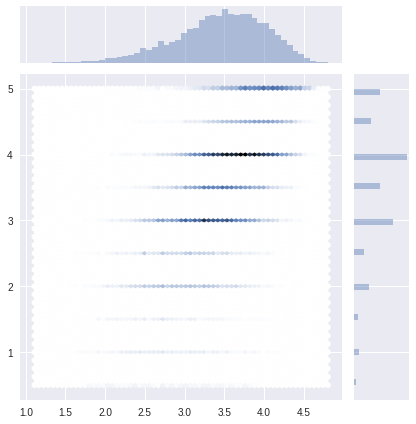

In [12]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

In [0]:
movie_names = movies.set_index('movieId')['title'].to_dict()
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False).index.values[:3000]
topMovieIdx = np.array([cf.item2idx[o] for o in topMovies])

In [14]:
m=learn.model; m.cuda()

EmbeddingDotBias(
  (u): Embedding(610, 50)
  (i): Embedding(9724, 50)
  (ub): Embedding(610, 1)
  (ib): Embedding(9724, 1)
)

In [0]:
movie_bias = to_np(m.ib(V(topMovieIdx)))

In [0]:
movie_ratings = [(b[0], movie_names[i]) for i,b in zip(topMovies,movie_bias)]

In [17]:
sorted(movie_ratings, key=lambda o: o[0])[:15]

[(-0.72690755, 'Speed 2: Cruise Control (1997)'),
 (-0.6963655, 'Anaconda (1997)'),
 (-0.6738375, 'Battlefield Earth (2000)'),
 (-0.6726437, 'Spice World (1997)'),
 (-0.67257804, 'Godzilla (1998)'),
 (-0.6636633, 'Flintstones in Viva Rock Vegas, The (2000)'),
 (-0.65212655, 'Karate Kid, Part III, The (1989)'),
 (-0.64864033, 'Problem Child (1990)'),
 (-0.6404013, 'Catwoman (2004)'),
 (-0.62763536, 'Grease 2 (1982)'),
 (-0.62490857, 'Stop! Or My Mom Will Shoot (1992)'),
 (-0.6174911, 'Stuart Saves His Family (1995)'),
 (-0.6161357, 'Honey, I Blew Up the Kid (1992)'),
 (-0.59196544, 'Batman & Robin (1997)'),
 (-0.5850735, 'Joe Dirt (2001)')]

In [18]:
sorted(movie_ratings, key=itemgetter(0))[:15]

[(-0.72690755, 'Speed 2: Cruise Control (1997)'),
 (-0.6963655, 'Anaconda (1997)'),
 (-0.6738375, 'Battlefield Earth (2000)'),
 (-0.6726437, 'Spice World (1997)'),
 (-0.67257804, 'Godzilla (1998)'),
 (-0.6636633, 'Flintstones in Viva Rock Vegas, The (2000)'),
 (-0.65212655, 'Karate Kid, Part III, The (1989)'),
 (-0.64864033, 'Problem Child (1990)'),
 (-0.6404013, 'Catwoman (2004)'),
 (-0.62763536, 'Grease 2 (1982)'),
 (-0.62490857, 'Stop! Or My Mom Will Shoot (1992)'),
 (-0.6174911, 'Stuart Saves His Family (1995)'),
 (-0.6161357, 'Honey, I Blew Up the Kid (1992)'),
 (-0.59196544, 'Batman & Robin (1997)'),
 (-0.5850735, 'Joe Dirt (2001)')]

In [19]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(1.2108029, 'Shawshank Redemption, The (1994)'),
 (0.9227477, "Schindler's List (1993)"),
 (0.9191132, 'Goodfellas (1990)'),
 (0.90431005, 'Pulp Fiction (1994)'),
 (0.8957318, 'Fight Club (1999)'),
 (0.8938909, 'Forrest Gump (1994)'),
 (0.89006275, 'Casablanca (1942)'),
 (0.88654524, 'Usual Suspects, The (1995)'),
 (0.8854236,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (0.8704845, "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)"),
 (0.86225796, 'Star Wars: Episode IV - A New Hope (1977)'),
 (0.83956045, 'Godfather, The (1972)'),
 (0.8298348, 'Star Wars: Episode VI - Return of the Jedi (1983)'),
 (0.8296184, 'Dark Knight, The (2008)'),
 (0.827155, 'Star Wars: Episode V - The Empire Strikes Back (1980)')]

In [20]:
movie_emb = to_np(m.i(V(topMovieIdx)))
movie_emb.shape

(3000, 50)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
movie_pca = pca.fit(movie_emb.T).components_

In [23]:
movie_pca.shape

(3, 3000)

In [0]:
fac0 = movie_pca[0]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac0, topMovies)]

In [25]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.08318204, 'Monty Python and the Holy Grail (1975)'),
 (0.082962096, 'Godfather, The (1972)'),
 (0.077975824, 'Pulp Fiction (1994)'),
 (0.07615881, 'Godfather: Part II, The (1974)'),
 (0.07347094,
  'Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)'),
 (0.06930738, 'Kill Bill: Vol. 2 (2004)'),
 (0.06713289, 'Big Lebowski, The (1998)'),
 (0.066554055, 'Kill Bill: Vol. 1 (2003)'),
 (0.062920876, 'Apocalypse Now (1979)'),
 (0.06290506, 'Memento (2000)')]

In [26]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.065058514, 'Matrix Revolutions, The (2003)'),
 (-0.064078964, 'Twister (1996)'),
 (-0.054779522, 'Wild Wild West (1999)'),
 (-0.052147374, 'The Scorpion King (2002)'),
 (-0.051650435, 'Flintstones, The (1994)'),
 (-0.05146105, 'Broken Arrow (1996)'),
 (-0.050803658, 'Bone Collector, The (1999)'),
 (-0.050677557, 'Armageddon (1998)'),
 (-0.049148194, 'Congo (1995)'),
 (-0.04792809, 'Anaconda (1997)')]

In [0]:
fac1 = movie_pca[1]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac1, topMovies)]

In [28]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.10613155, 'Back to the Future (1985)'),
 (0.10262743, 'E.T. the Extra-Terrestrial (1982)'),
 (0.10256237, 'Star Wars: Episode I - The Phantom Menace (1999)'),
 (0.09807167,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (0.087801985, 'Independence Day (a.k.a. ID4) (1996)'),
 (0.08557081, 'Forrest Gump (1994)'),
 (0.08517335, 'Jurassic Park (1993)'),
 (0.08060421, 'True Lies (1994)'),
 (0.079856835, 'Armageddon (1998)'),
 (0.07767156, 'Caddyshack (1980)')]

In [29]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.07254438, 'Mulholland Drive (2001)'),
 (-0.066784374, "Boys Don't Cry (1999)"),
 (-0.052082516, 'Predator 2 (1990)'),
 (-0.0506485, 'Election (1999)'),
 (-0.049219597, 'Hours, The (2002)'),
 (-0.04862544, 'Heavenly Creatures (1994)'),
 (-0.04816398, 'Shaft (2000)'),
 (-0.045800775, 'Bottle Rocket (1996)'),
 (-0.044794682, 'Happiness (1998)'),
 (-0.0446676, 'Madness of King George, The (1994)')]

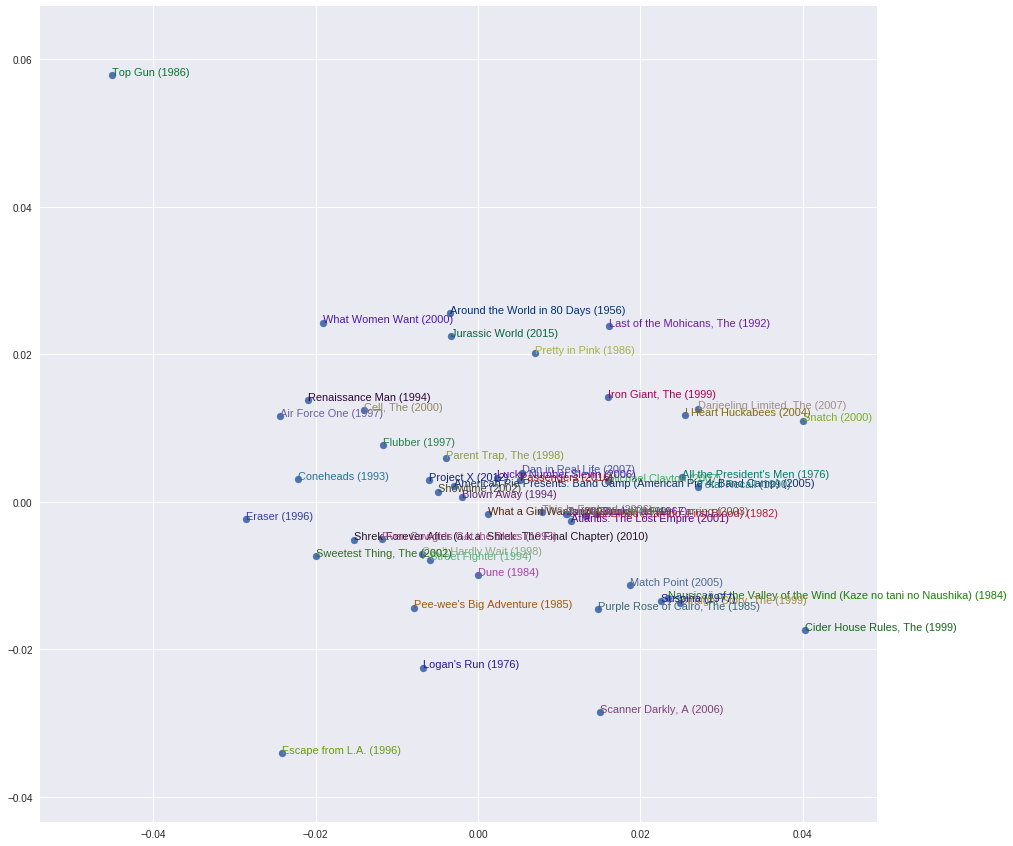

In [30]:
idxs = np.random.choice(len(topMovies), 50, replace=False)
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topMovies[idxs], X, Y):
    plt.text(x,y,movie_names[i], color=np.random.rand(3)*0.7, fontsize=11)
plt.show()